In [ ]:
!pip install pandas


In [ ]:
!pip install lazypredict
!pip install tweet-preprocessor
!pip install -U pip setuptools wheel
!pip install spacy
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk

In [ ]:
import pandas as pd

import string
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lazypredict.Supervised import LazyClassifier
import preprocessor as p
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 

#nlp = spacy.load('en_core_web_sm')
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/gddrive')

Mounted at /gddrive


In [ ]:
# df = pd.read_csv('/gddrive/MyDrive/Colab Notebooks/Marathi_tweet_sentiment/covid19.csv')
df = pd.read_csv('/content/pred_data1.csv')

In [ ]:
clean_data =df.iloc[:,0].apply(lambda x: p.clean(x))

Data Preprocessing/Module 3

In [ ]:
# data clean methods
stopword=stopword+['brt','xfxfxcxe','xfxfxxvaccin']

def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    #after tweepy preprocessing the colon symbol left remain after    
    tweet = re.sub(r':', '', text_rc)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #filter using NLTK library append it to a string
    tokens = re.split('\W+', tweet)    # tokenization
    text = [word for word in tokens if word not in stopword]  # remove stopwords
    return text

In [ ]:
df['clean_tweets'] = clean_data.apply(lambda x:clean_text(x))
df['clean_tweets']= df['clean_tweets'].apply(lambda x: ' '.join(x))

In [ ]:
df

,0,clean_tweets,label
0,VIDEO: Gulabrao Patil | Koronakalata not right...,video gulabrao patil koronakalata right khadse...,0
1,"Corona: Corona, but the new strain of origin a...",corona corona new strain origin amaravatituna ...,0
2,"Corona Vaccine Update: US expert said, kovida ...",corona vaccine update us expert said kovida co...,0
3,Hundreds of new Parliament's work in strict lo...,hundreds new parliaments work strict lockdown ...,0
4,"Corona Disaster: No doctor, no oxygen ... Delh...",corona disaster doctor oxygen delhi hospitals ...,2
...,...,...,...
3495,Radio Nagpur headlines evening date 27.04.2021...,radio nagpur headlines evening date via,0
3496,Radio Nagpur headlines evening date 27.04.2021...,radio nagpur headlines evening date via,0
3497,You see your work at the start of the DR jipar...,see work start dr jiparata flap nagpur see pro...,1
3498,"Today, the district has found a new # # karona...",today district found new karonabadhita thousan...,1


In [ ]:
df.head()

,0,clean_tweets,label
0,VIDEO: Gulabrao Patil | Koronakalata not right...,video gulabrao patil koronakalata right khadse...,0
1,"Corona: Corona, but the new strain of origin a...",corona corona new strain origin amaravatituna ...,0
2,"Corona Vaccine Update: US expert said, kovida ...",corona vaccine update us expert said kovida co...,0
3,Hundreds of new Parliament's work in strict lo...,hundreds new parliaments work strict lockdown ...,0
4,"Corona Disaster: No doctor, no oxygen ... Delh...",corona disaster doctor oxygen delhi hospitals ...,2


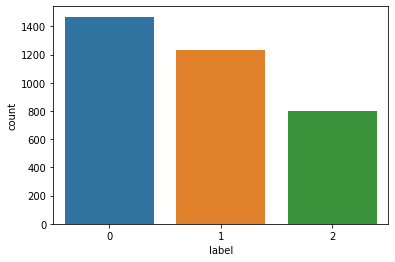

In [ ]:
sns.countplot(df['label'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df['clean_tweets']

0       video gulabrao patil koronakalata right khadse...
1       corona corona new strain origin amaravatituna ...
2       corona vaccine update us expert said kovida co...
3       hundreds new parliaments work strict lockdown ...
4       corona disaster doctor oxygen delhi hospitals ...
                              ...                        
3495              radio nagpur headlines evening date via
3496              radio nagpur headlines evening date via
3497    see work start dr jiparata flap nagpur see pro...
3498    today district found new karonabadhita thousan...
3499    update mobile number vijasevece get sms aurang...
Name: clean_tweets, Length: 3500, dtype: object

Build Algorithm & Predict Accurcy/Module 4

In [ ]:
X=df['clean_tweets']
y=df['label']
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
print('shape of x',X.shape)
clf=LinearSVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))


shape of x (3500, 4493)
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       294
           1       0.98      0.91      0.94       246
           2       0.93      0.86      0.89       160

    accuracy                           0.92       700
   macro avg       0.93      0.91      0.92       700
weighted avg       0.93      0.92      0.92       700



In [ ]:
def run_svm(df):
    X=df['clean_tweets']
    y=df['label']
    tfidf=TfidfVectorizer()
    X=tfidf.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
    print('shape of x',X.shape)
    clf=LinearSVC()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(classification_report(y_test,y_pred))
    
    return tfidf,clf
    

In [ ]:
%%time
tfidf,clf=run_svm(df)

shape of x (3500, 4493)
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       294
           1       0.98      0.91      0.94       246
           2       0.93      0.86      0.89       160

    accuracy                           0.92       700
   macro avg       0.93      0.91      0.92       700
weighted avg       0.93      0.92      0.92       700

CPU times: user 72.9 ms, sys: 575 µs, total: 73.5 ms
Wall time: 75.2 ms


In [ ]:
x=df['clean_tweets']
clf.predict(tfidf.transform(x))


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict=rf.predict(X_test)
accuracy_score(y_test,predict)


0.9185714285714286

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predict=dt.predict(X_test)
accuracy_score(y_test,predict)

0.9228571428571428

In [ ]:

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(X_train,y_train)
log_predictions = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[285,   4,   5],
       [ 30, 210,   6],
       [ 33,   5, 122]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)

0.8814285714285715

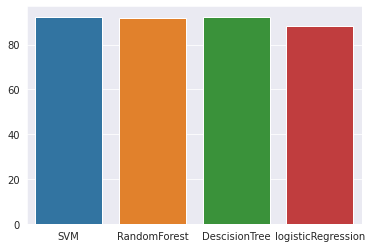

In [ ]:
sns.set_style('darkgrid')
x_axis=['SVM','RandomForest','DescisionTree','logisticRegression']
y_axis=[92.42,91.85,92.28,88.14]
sns.barplot(x_axis,y_axis)
plt.show()

Module Building/Module 5

In [ ]:
import joblib

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# save the model to disk
filename = 'RF_finalized_model.sav'
joblib.dump(rf, filename)
 


['RF_finalized_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9185714285714286


In [ ]:
#TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer() 
tfidfVector = tfidfVectorizer.fit_transform(df['clean_tweets'])

In [ ]:
text = 'RT @zlj517: Facing #COVID19, the British government suggested #HerdImmunity by infection regardless of the right to life and health. Across\xe2\x80\xa6'

def predict_sentiment(text):
  test_doc = ' '.join(clean_text(text))
  pd.DataFrame([test_doc]).iloc[0]
  test_vect = tfidfVectorizer.transform(pd.DataFrame([test_doc]).iloc[0])
  test_tfidf = pd.DataFrame(test_vect.toarray(), columns=tfidfVectorizer.get_feature_names()).iloc[:,0:]
  test_predict = rf.predict(test_tfidf)[0]
  print('Tweet: ',text,' \nPredicted sentiment of tweet: ',test_predict)

predict_sentiment(text)

Tweet:  RT @zlj517: Facing #COVID19, the British government suggested #HerdImmunity by infection regardless of the right to life and health. Acrossâ¦  
Predicted sentiment of tweet:  0
